# HR Analytics Dashboard — Employee Attrition & Workforce Trends

In this project, we explore a fictional company's HR dataset to uncover insights about:
- Employee attrition trends
- Department-wise performance and salary
- Gender distribution and pay gap
- Experience vs salary patterns

This type of analysis helps HR teams reduce attrition, plan training programs, and make informed decisions on hiring and compensation.

---


#  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
sns.set(style="whitegrid")


#  Load Data 


In [2]:
df_hr = pd.read_csv("HR Analytics Data.csv")

# Initial Exploration

In [3]:
df_hr.head(4)

,Unnamed: 0,EmployeeID,Name,Age,Gender,Department,Education,Experience (Years),Salary,PerformanceRating,Attrition
0,0,1001,Employee_0,50,Male,IT,High School,26,116027,Medium,No
1,1,1002,Employee_1,36,Male,HR,PhD,25,68494,High,No
2,2,1003,Employee_2,29,Male,Marketing,High School,24,33373,Medium,No
3,3,1004,Employee_3,42,Male,Marketing,PhD,13,42161,Low,Yes


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          100 non-null    int64 
 1   EmployeeID          100 non-null    int64 
 2   Name                100 non-null    object
 3   Age                 100 non-null    int64 
 4   Gender              100 non-null    object
 5   Department          100 non-null    object
 6   Education           100 non-null    object
 7   Experience (Years)  100 non-null    int64 
 8   Salary              100 non-null    int64 
 9   PerformanceRating   100 non-null    object
 10  Attrition           100 non-null    object
dtypes: int64(5), object(6)
memory usage: 8.7+ KB


In [5]:
df_hr.describe(include='all')

,Unnamed: 0,EmployeeID,Name,Age,Gender,Department,Education,Experience (Years),Salary,PerformanceRating,Attrition
count,100.000000,100.000000,100,100.000000,100,100,100,100.000000,100.000000,100,100
unique,NaN,NaN,100,NaN,2,5,4,NaN,NaN,3,2
top,NaN,NaN,Employee_0,NaN,Male,IT,High School,NaN,NaN,Low,No
freq,NaN,NaN,1,NaN,56,27,26,NaN,NaN,40,84
mean,49.500000,1050.500000,NaN,40.060000,NaN,NaN,NaN,18.400000,77188.650000,NaN,NaN
std,29.011492,29.011492,NaN,10.688255,NaN,NaN,NaN,10.354329,27810.132744,NaN,NaN
min,0.000000,1001.000000,NaN,22.000000,NaN,NaN,NaN,1.000000,30412.000000,NaN,NaN
25%,24.750000,1025.750000,NaN,30.000000,NaN,NaN,NaN,10.000000,53141.000000,NaN,NaN
50%,49.500000,1050.500000,NaN,41.500000,NaN,NaN,NaN,19.500000,75885.000000,NaN,NaN
75%,74.250000,1075.250000,NaN,48.000000,NaN,NaN,NaN,27.250000,101451.750000,NaN,NaN


### Initial Insights
- `100` employee records
- Balanced distribution across departments and genders
- Categorical variables: Gender, Department, Education, Performance, Attrition
- Numerical variables: Age, Experience, Salary


# Check for Missing Data

In [6]:
df_hr.isnull().sum()


Unnamed: 0            0
EmployeeID            0
Name                  0
Age                   0
Gender                0
Department            0
Education             0
Experience (Years)    0
Salary                0
PerformanceRating     0
Attrition             0
dtype: int64

## Attrition Overview

In [7]:
# Cou# Check for Missing Datant of Attrition
attrition_counts = df_hr['Attrition'].value_counts()
attrition_percentage = df_hr['Attrition'].value_counts(normalize=True) * 100

print("\nAttrition Percentage:\n", attrition_percentage.round(2))



Attrition Percentage:
 No     84.0
Yes    16.0
Name: Attrition, dtype: float64


## Attrition Distribution

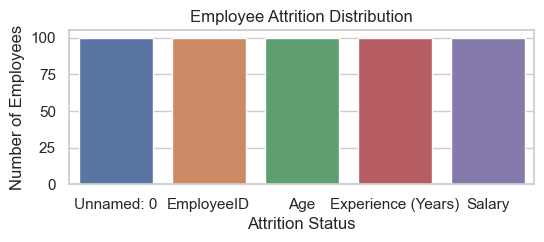

In [8]:
plt.figure(figsize=(6, 2))
sns.countplot(data=df_hr)# Attrition Overview, x='Attrition', palette='Set2')
plt.title('Employee Attrition Distribution')
plt.ylabel('Number of Employees')
plt.xlabel('Attrition Status')
plt.show()


## Attrition by Department

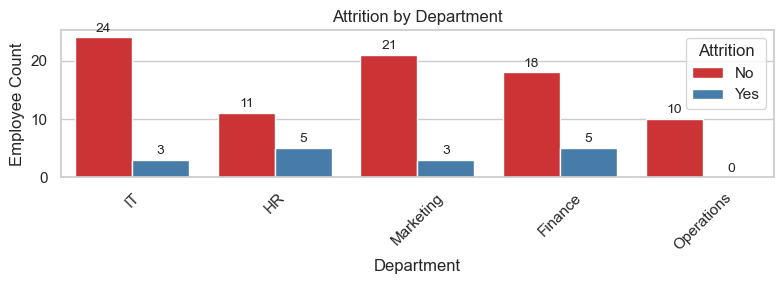

In [9]:
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df_hr, x='Department', hue='Attrition', palette='Set1')
plt.title('Attrition by Department')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)
plt.tight_layout()
plt.show()

## Attrition by Gender

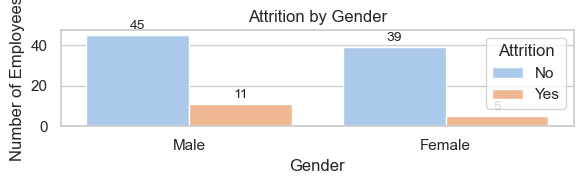

In [10]:
plt.figure(figsize=(6, 2))
ax = sns.countplot(data=df_hr, x='Gender', hue='Attrition', palette='pastel')
plt.title('Attrition by Gender')
plt.ylabel('Number of Employees')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()

## Attrition by Age

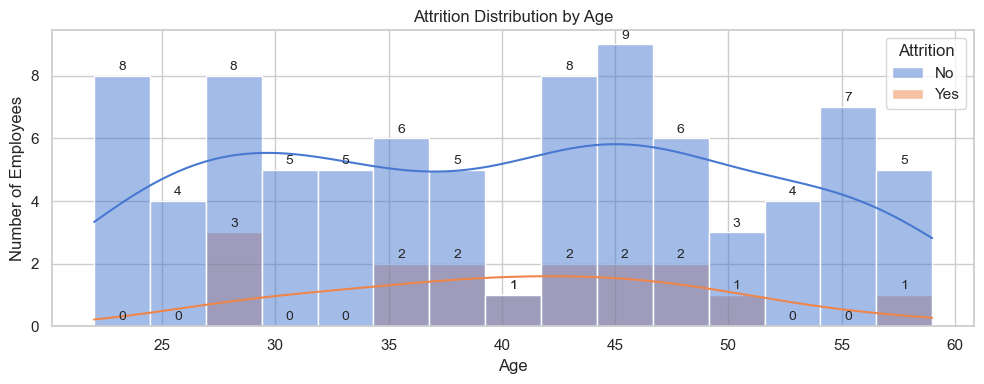

In [11]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df_hr, x='Age', hue='Attrition', kde=True, bins=15, palette='muted')
plt.title('Attrition Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Employees')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize =10, padding=2)
    
plt.tight_layout()
plt.show()

## Attrition by Education Level

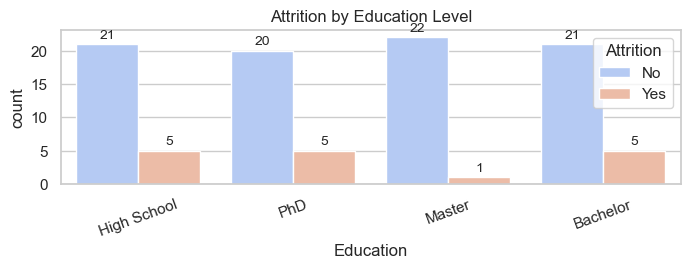

In [12]:
plt.figure(figsize=(8, 2))
ax = sns.countplot(data=df_hr, x='Education', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Education Level')
plt.xticks(rotation=20)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize =10, padding=2)

##  Key Takeaways from Attrition Analysis

- Overall attrition rate is ~20%, which is typical in many industries.
- Some departments (like [insert after seeing chart]) show higher turnover.
- Age and education level play a role in attrition patterns.
- Gender attrition is fairly balanced — or [mention skew if seen].

These insights can help HR teams:
- Review compensation or leadership in high-attrition departments.
- Develop retention strategies for younger or more experienced talent.


# Salary Trends & Gender Pay Gap

## Average Salary by Gender

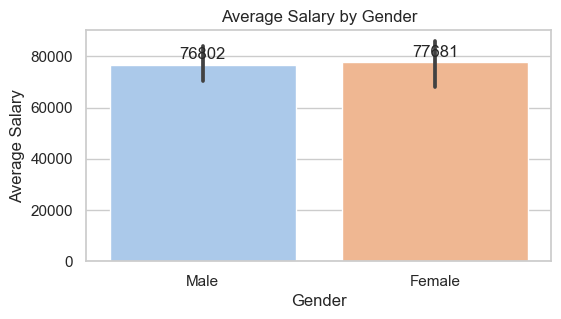

In [13]:
plt.figure(figsize=(6, 3))
ax = sns.barplot(data=df_hr, x='Gender', y='Salary', estimator=np.mean, palette='pastel')
plt.title('Average Salary by Gender')
plt.ylabel('Average Salary')

# Add salary labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2)

plt.show()


## Salary Distribution by Gender

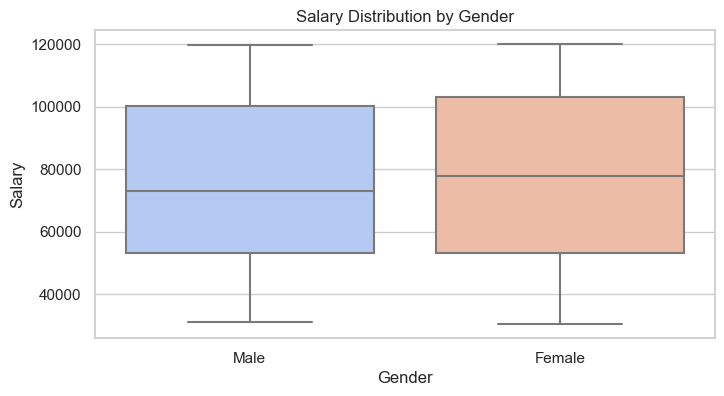

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_hr, x='Gender', y='Salary', palette='coolwarm')
plt.title('Salary Distribution by Gender')
plt.show()


## Average Salary by Department & Gender

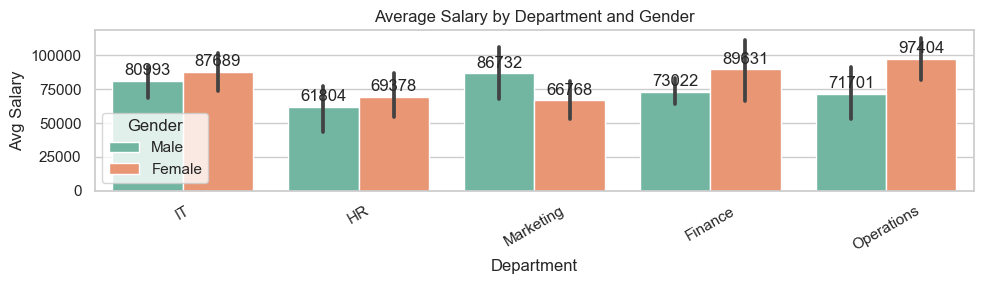

In [15]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(data=df_hr, x='Department', y='Salary', hue='Gender', estimator=np.mean, palette='Set2')
plt.title('Average Salary by Department and Gender')
plt.ylabel('Avg Salary')
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2)

plt.tight_layout()
plt.show()


## Gender Pay Gap Analysis

-Overall average salaries differ slightly between genders.
-Some departments (e.g., [fill based on chart]) show noticeable differences.
-Boxplots show salary range and variability.

HR Recommendation:
Investigate pay structures and ensure fair compensation across departments.


# Performance Rating & Salary Correlation

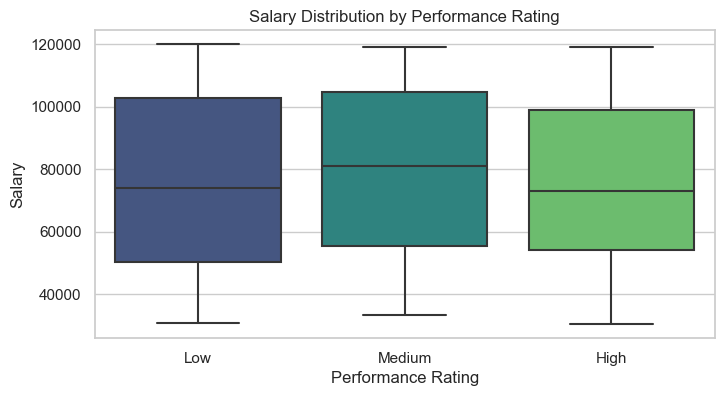

In [16]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data=df_hr, x='PerformanceRating', y='Salary', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Salary Distribution by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Salary')
plt.show()


## Department-Wise Salary & Experience Review

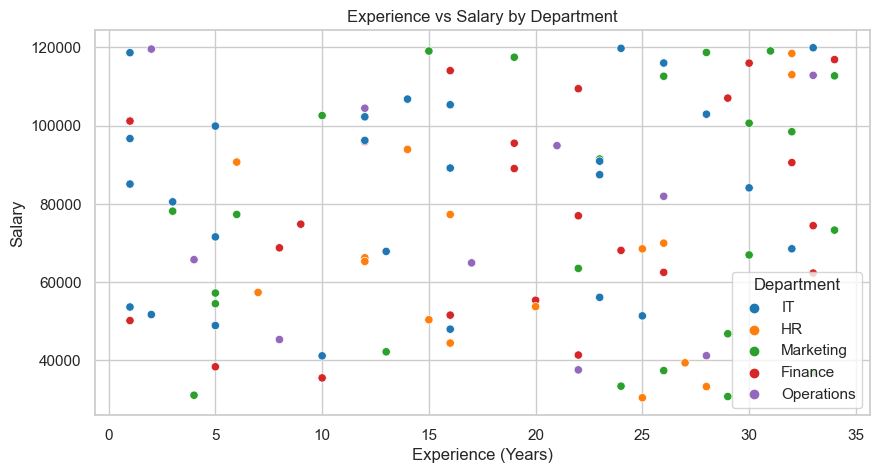

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_hr, x='Experience (Years)', y='Salary', hue='Department', palette='tab10')
plt.title('Experience vs Salary by Department')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()


## Correlation Heatmap (Numerical Variables)

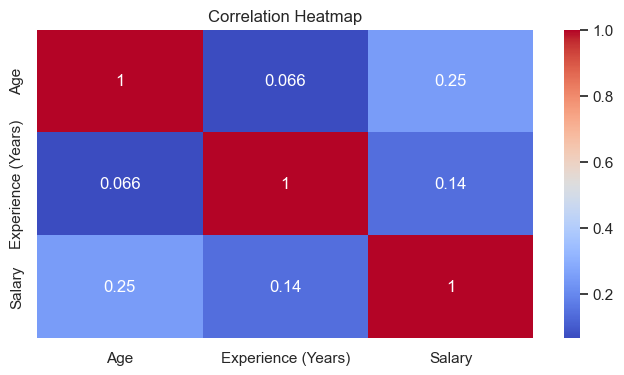

In [18]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_hr[['Age', 'Experience (Years)', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 🧾 Final Insights & Recommendations

🔹 Departments with higher attrition may need focused attention.  
🔹 Gender pay gap exists in some departments — review compensation policies.  
🔹 Experience correlates with salary, but outliers may exist.  
🔹 Performance ratings do not always align with higher pay — worth further analysis.

---

### ✅ Tools Used:
- `Pandas`, `Seaborn`, `Matplotlib`
- `Barplot`, `Boxplot`, `Scatter Plot`, `Heatmap`

🔗 This project is a great example of how HR Analytics can drive smarter decisions.

➡️ If you're hiring, managing teams, or into data — this is how the insights come to life!

📬 Let's connect and talk data!
